In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


import glob

In [2]:
madrid = pd.read_csv('madrid.csv')

In [3]:
madrid.dtypes

Unnamed: 0      int64
BEN           float64
CH4           float64
CO            float64
EBE           float64
MXY           float64
NMHC          float64
NO            float64
NO_2          float64
NOx           float64
OXY           float64
O_3           float64
PM10          float64
PM25          float64
PXY           float64
SO_2          float64
TCH           float64
TOL           float64
date           object
station         int64
dtype: object

In [4]:
madrid.isnull().sum()

Unnamed: 0          0
BEN           2766540
CH4           3793374
CO            1157212
EBE           2806500
MXY           3492809
NMHC          2722912
NO            2275827
NO_2            21174
NOx           1431949
OXY           3492529
O_3            816492
PM10           946969
PM25          2991800
PXY           3492640
SO_2          1032264
TCH           2721783
TOL           2769295
date                0
station             0
dtype: int64

In [5]:
madrid['dateParsed'] = pd.to_datetime(madrid.date.astype(str))

In [6]:
madrid_avg = madrid.groupby(['dateParsed']).agg('mean')

In [7]:
madrid_avg.head()

,Unnamed: 0,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
dateParsed,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,108372.0,3.176667,NaN,1.2568,2.560000,4.582,0.239,NaN,55.287601,120.004799,2.220,7.8292,30.660417,NaN,1.802,22.1004,1.575,10.584444,28079022.44
2001-01-01 02:00:00,108397.0,7.001111,NaN,2.2696,4.711429,5.714,0.383,NaN,55.848400,183.621999,2.632,7.0744,41.035909,NaN,2.226,24.0064,1.733,19.410000,28079022.44
2001-01-01 03:00:00,108422.0,9.768889,NaN,2.3544,6.628572,10.158,0.401,NaN,55.720800,214.429599,4.372,6.8332,56.345218,NaN,3.894,25.4832,1.778,29.270000,28079022.44
2001-01-01 04:00:00,108447.0,9.554444,NaN,2.0456,7.222857,14.372,0.365,NaN,56.596800,205.904398,6.450,7.1856,47.972083,NaN,5.576,23.6180,1.779,30.757778,28079022.44
2001-01-01 05:00:00,108472.0,7.343333,NaN,1.4376,5.522857,11.570,0.260,NaN,53.827600,164.040400,5.426,7.9592,36.637083,NaN,4.516,20.0304,1.795,24.490000,28079022.44


In [8]:
madrid_avg.shape

(151896, 19)

In [9]:
madrid_avg.isnull().sum()

Unnamed: 0         0
BEN               29
CH4           146809
CO                28
EBE               29
MXY            69706
NMHC              28
NO             87655
NO_2              28
NOx            59180
OXY            69706
O_3               28
PM10              59
PM25           27267
PXY            69711
SO_2              28
TCH               27
TOL               29
station            0
dtype: int64

In [10]:
madrid_avg = madrid_avg.drop('CH4', axis = 1)

In [11]:
madrid_avg.columns

Index(['Unnamed: 0', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO', 'NO_2', 'NOx',
       'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [12]:
madrid_avg.reset_index(inplace = True)

In [13]:
columns = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO', 'NO_2', 'NOx',
       'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL']

In [14]:
madrid_avg.columns

Index(['dateParsed', 'Unnamed: 0', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO',
       'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH',
       'TOL', 'station'],
      dtype='object')

In [15]:
madrid_avg.index

RangeIndex(start=0, stop=151896, step=1)

In [16]:
madrid_avg.drop(['Unnamed: 0'], axis =1, inplace = True)

In [17]:
madrid_avg['year'] = madrid_avg['dateParsed'].apply(lambda x: x.year)
madrid_avg['month'] = madrid_avg['dateParsed'].apply(lambda x: x.month)

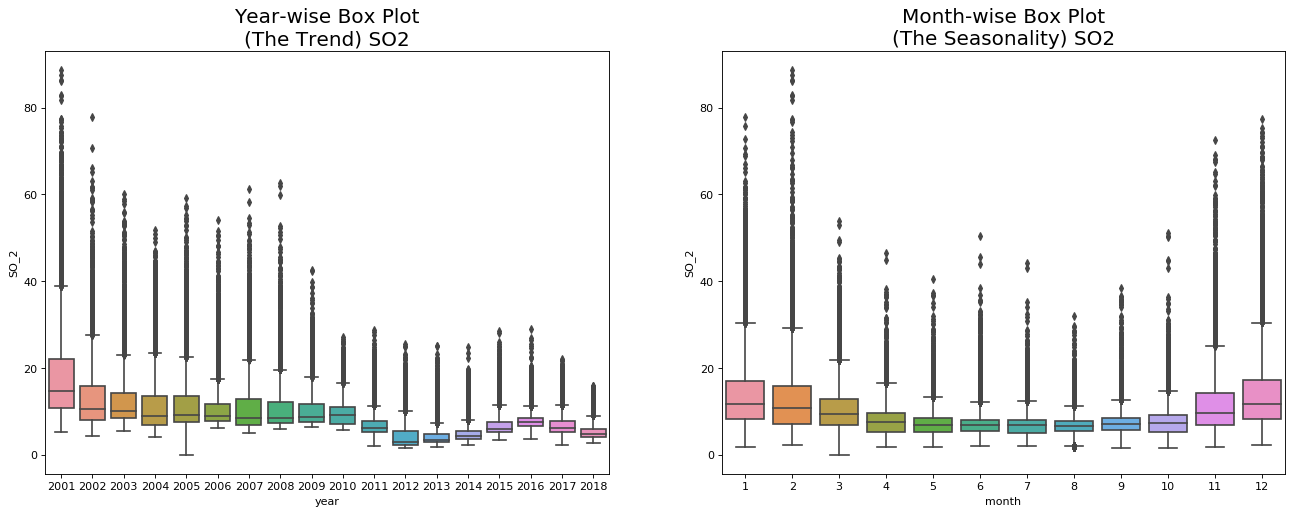

In [18]:
%matplotlib inline
import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='SO_2', data=madrid_avg, ax=axes[0])
sns.boxplot(x='month', y='SO_2', data= madrid_avg)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend) SO2', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality) SO2', fontsize=18)
plt.show()

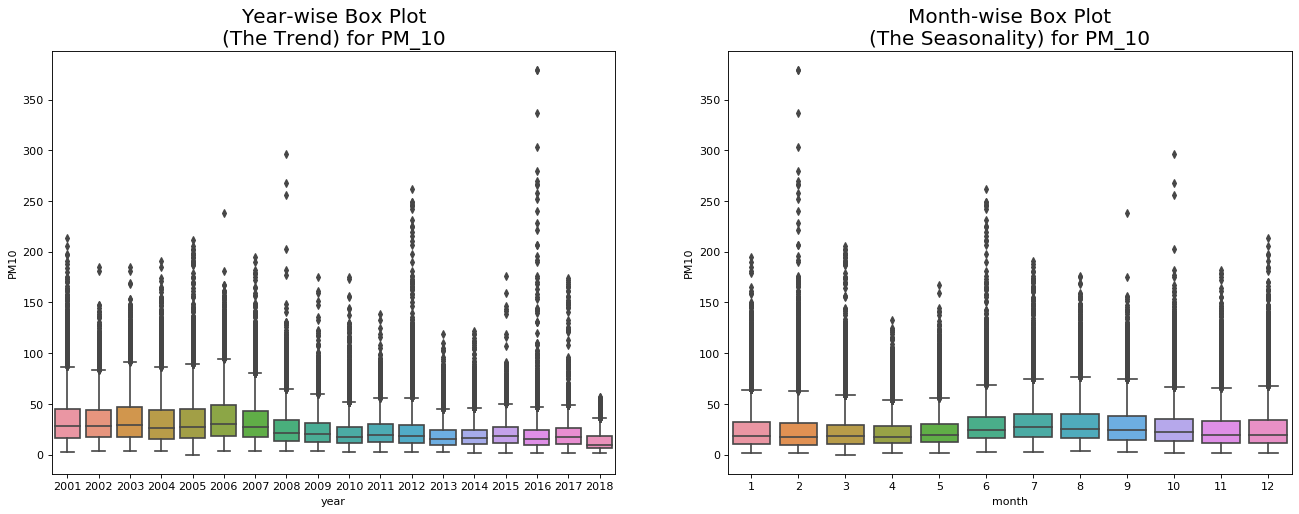

In [19]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PM10', data=madrid_avg, ax=axes[0])
sns.boxplot(x='month', y='PM10', data= madrid_avg)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend) for PM_10', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality) for PM_10', fontsize=18)
plt.show()

In [20]:
madrid_avg_y = madrid_avg.groupby(['year']).agg('mean')

In [21]:
madrid_avg_m = madrid_avg.groupby(['month']).agg('mean')

In [33]:
#madrid_monhly = madrid_avg.resample('M').mean()
#madrid_daily = madrid_avg.resample('D').mean()
#madrid_yearly = madrid_avg.resample('Y').mean()


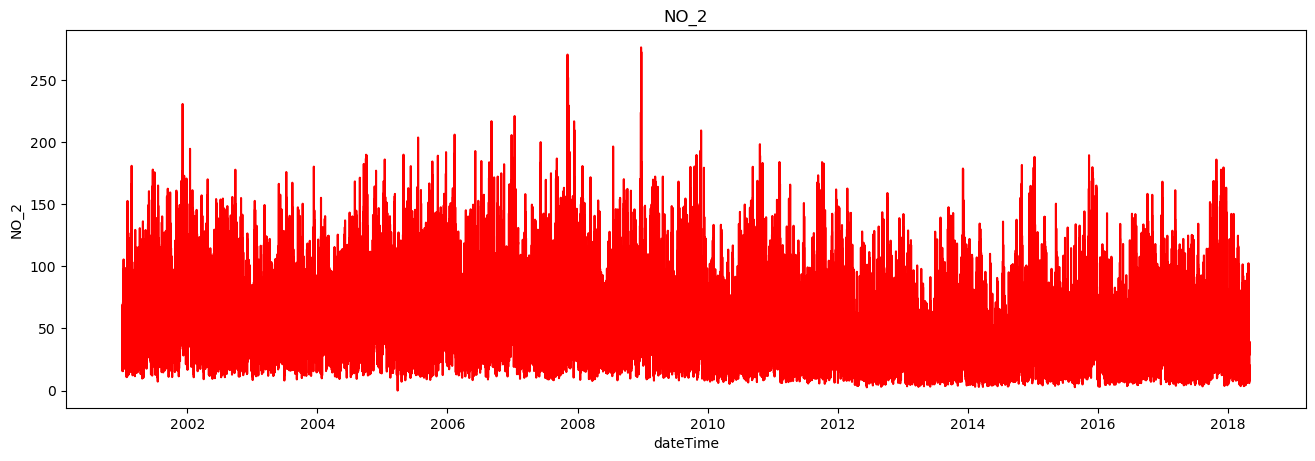

In [23]:
plot_df(madrid_avg, x=madrid_avg['dateParsed'], y= madrid_avg['NO_2'], title='NO_2', ylabel = 'NO_2', xlabel='dateTime')

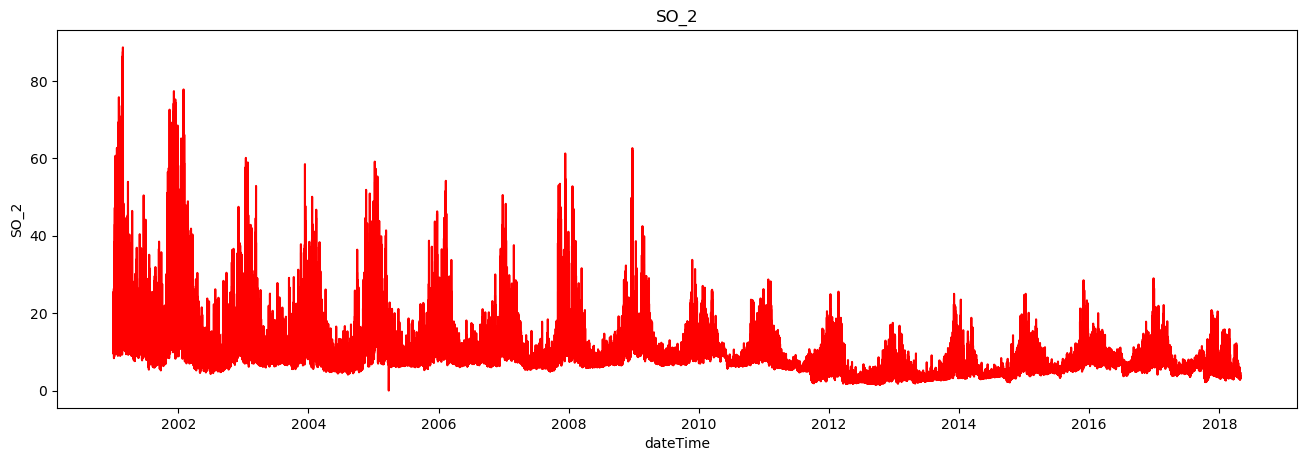

In [24]:
plot_df(madrid_avg, x=madrid_avg['dateParsed'], y= madrid_avg['SO_2'], title='SO_2', ylabel = 'SO_2', xlabel='dateTime')

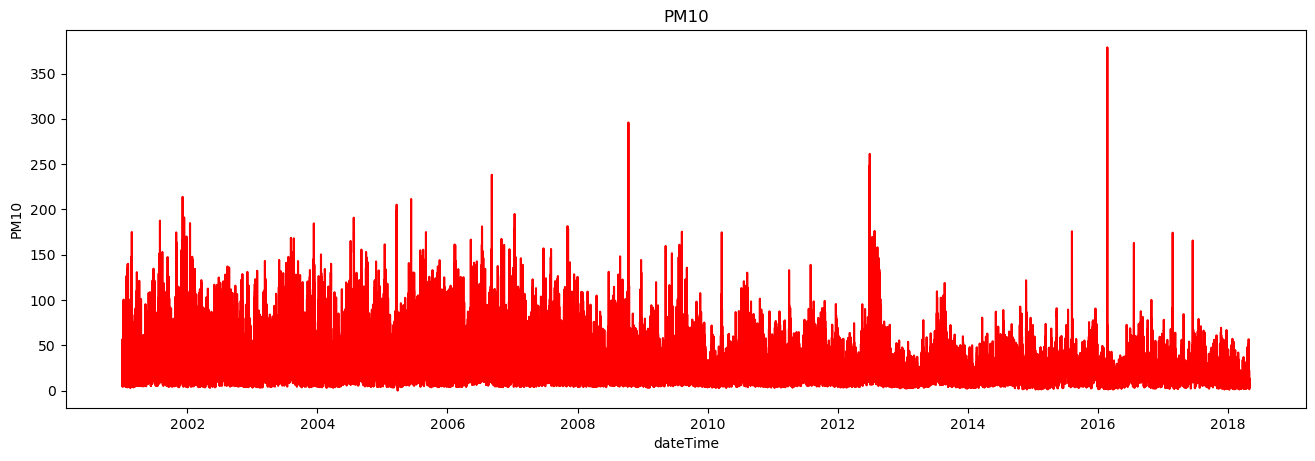

In [25]:
plot_df(madrid_avg, x=madrid_avg['dateParsed'], y= madrid_avg['PM10'], title='PM10', ylabel = 'PM10', xlabel='dateTime')

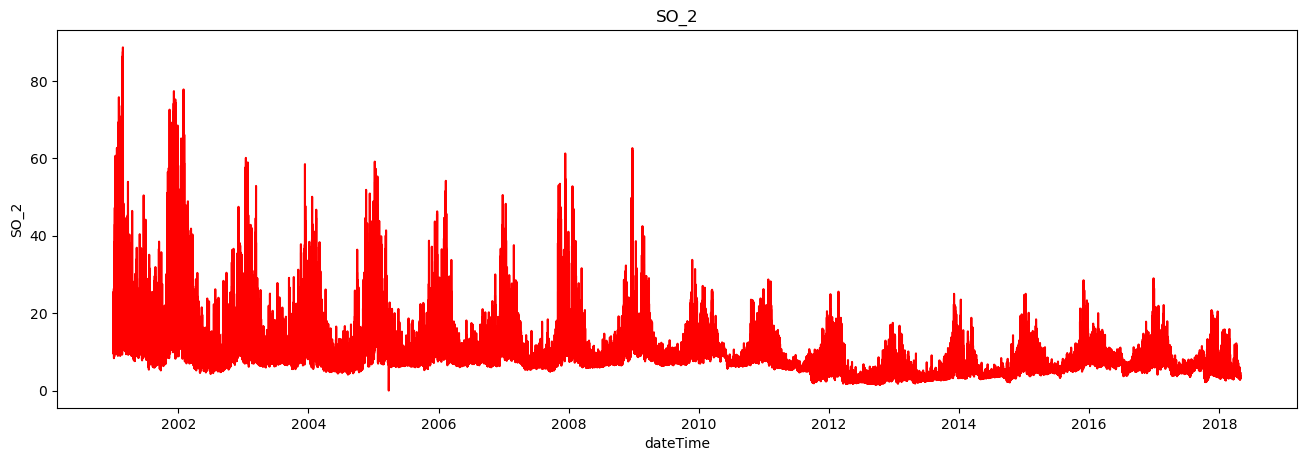

In [26]:
plot_df(madrid_avg, x=madrid_avg['dateParsed'], y= madrid_avg['SO_2'], title='SO_2', ylabel = 'SO_2', xlabel='dateTime')

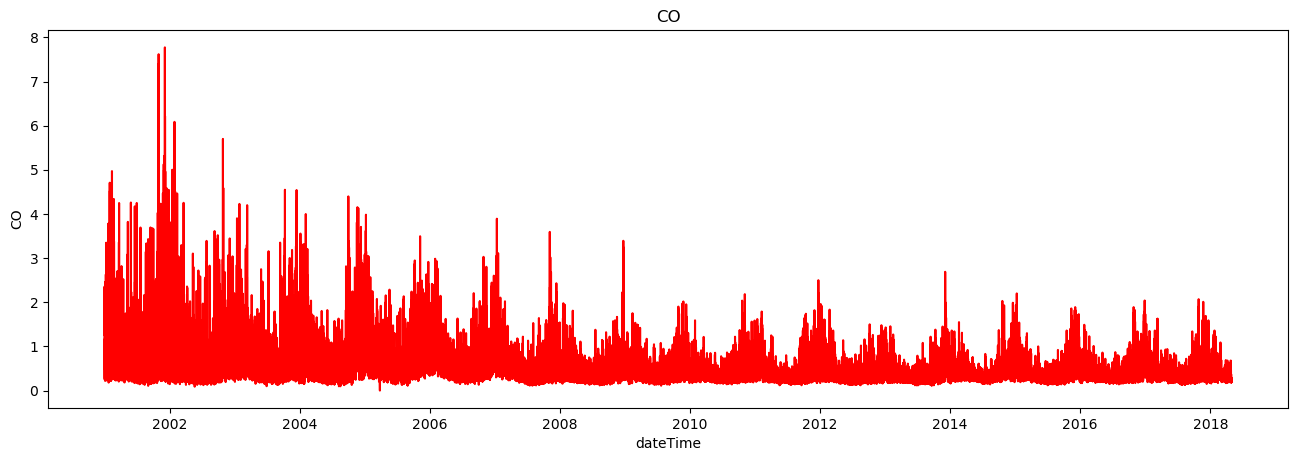

In [27]:
plot_df(madrid_avg, x=madrid_avg['dateParsed'], y= madrid_avg['CO'], title='CO', ylabel = 'CO', xlabel='dateTime')

In [28]:
list_stations = [28079004,28079008, 28079011,28079018,28079024, 28079035,28079038, 28079039,28079047, 28079048, 28079049,28079050, 28079056]

In [29]:
list2 = [28079018,28079024,28079039,28079050, 28079056, 28079016, 28079036,28079040] 

In [30]:
list3 = [28079060, 28079057, 28079059,28079055, 28079027, 28079054]

In [31]:
madrid1 = madrid.loc[(madrid.station == 28079004)|(madrid.station == 28079035)|(madrid.station == 28079049)| \
           (madrid.station == 28079047)|(madrid.station == 28079048)| (madrid.station == 28079011)| \
           (madrid.station ==28079008)| (madrid.station == 28079038)]

In [32]:
madrid2 = madrid.loc[(madrid.station == 28079018)|(madrid.station == 28079024)|(madrid.station == 28079039)| \
           (madrid.station == 28079050)|(madrid.station == 28079056)| (madrid.station == 28079016)| \
           (madrid.station ==28079036)| (madrid.station == 28079040)]

In [33]:
madrid3 = madrid.loc[(madrid.station == 28079060)|(madrid.station == 28079057)|(madrid.station == 28079059)| \
           (madrid.station == 28079055)|(madrid.station == 28079027)| (madrid.station == 28079054)]

In [34]:
madrid1_avg = madrid1.groupby(['dateParsed']).agg('mean')

In [35]:
madrid1_yearly = madrid1_avg.resample('Y').mean()

In [36]:
madrid1_monthly = madrid1_avg.resample('M').mean()

In [37]:
madrid1_yearly.PM10.mean()

26.365225254258018

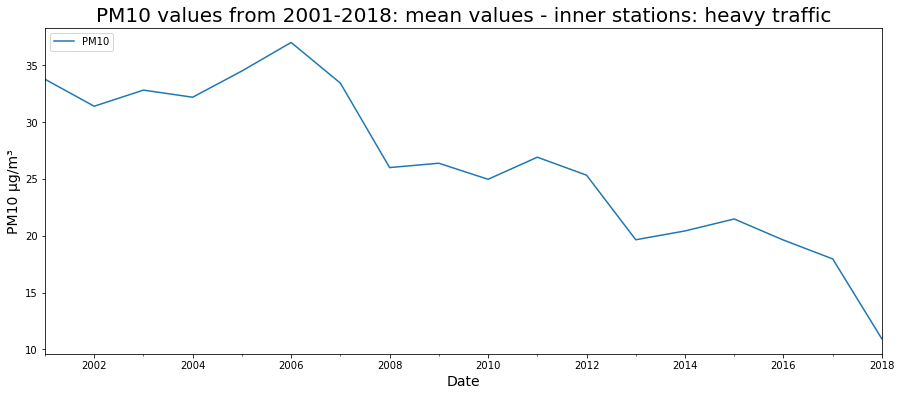

In [38]:
madrid1_yearly.PM10.plot(figsize=(15, 6))
plt.title('PM10 values from 2001-2018: mean values - inner stations: heavy traffic', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 μg/m³', fontsize=14)
plt.show()

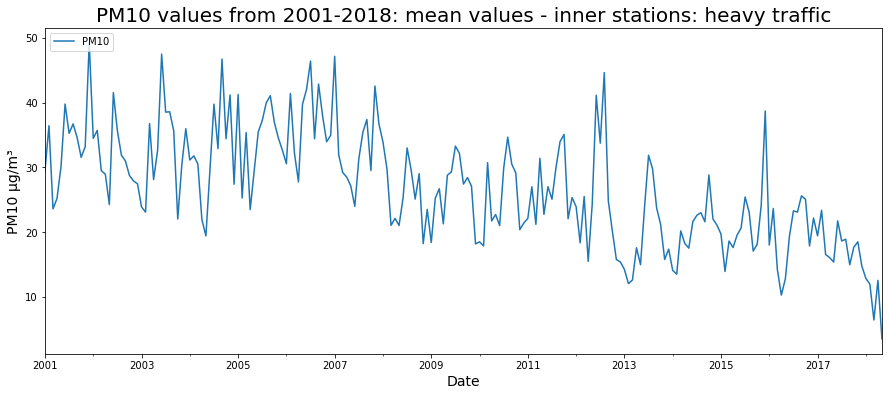

In [39]:
madrid1_monthly.PM10.plot(figsize=(15, 6))
plt.title('PM10 values from 2001-2018: mean values - inner stations: heavy traffic', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 μg/m³', fontsize=14)
plt.show()

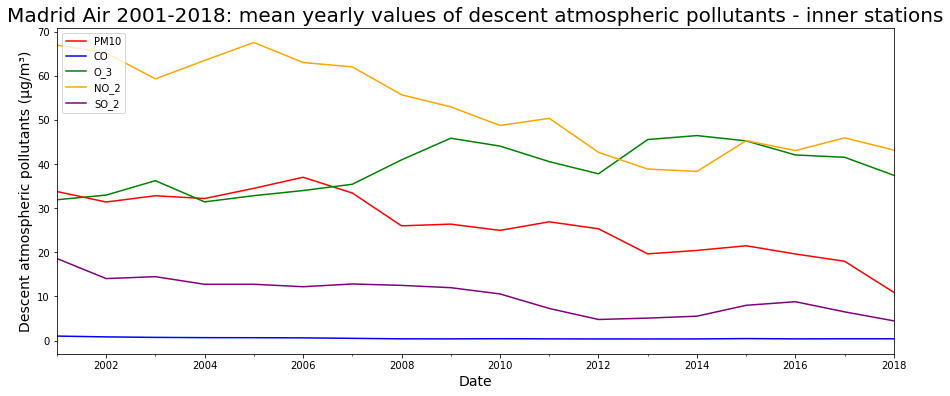

In [40]:
madrid1_yearly.PM10.plot(figsize=(15, 6), color = 'red')
madrid1_yearly.CO.plot(figsize=(15, 6), color = 'blue')
madrid1_yearly.O_3.plot(figsize=(15, 6), color = 'green')
madrid1_yearly.NO_2.plot(figsize=(15, 6), color = 'orange')
madrid1_yearly.SO_2.plot(figsize=(15, 6), color = 'purple')
plt.title('Madrid Air 2001-2018: mean yearly values of descent atmospheric pollutants - inner stations', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Descent atmospheric pollutants (μg/m³)', fontsize=14)
plt.show()

In [41]:
madrid1.shape

(926232, 21)

Text(0.5, 1.0, 'O_3 distribution across different stations')

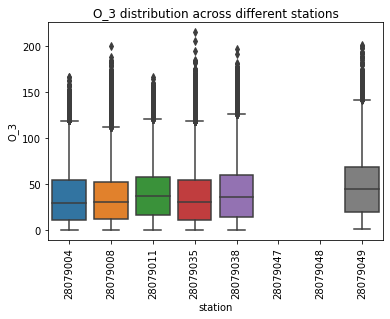

In [42]:
ax = sns.boxplot(x="station", y="O_3", data=madrid1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("O_3 distribution across different stations")

Text(0.5, 1.0, 'SO_2 distribution across different stations')

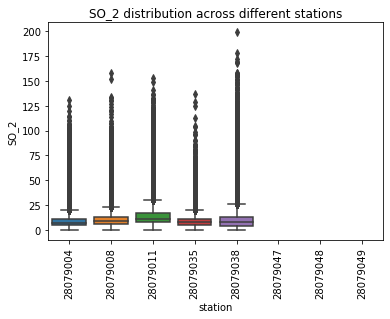

In [43]:
ax = sns.boxplot(x="station", y="SO_2", data=madrid1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("SO_2 distribution across different stations")

Text(0.5, 1.0, 'NO_2 distribution across different stations')

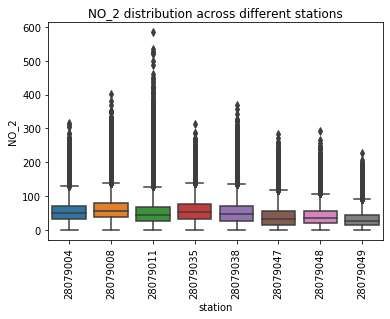

In [44]:
ax = sns.boxplot(x="station", y="NO_2", data=madrid1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("NO_2 distribution across different stations")

Text(0.5, 1.0, 'CO distribution across different stations')

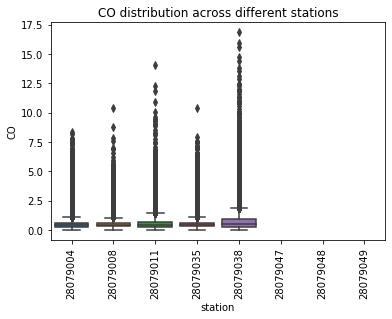

In [45]:
ax = sns.boxplot(x="station", y="CO", data=madrid1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("CO distribution across different stations")

Text(0.5, 1.0, 'PM10 distribution across different inner stations')

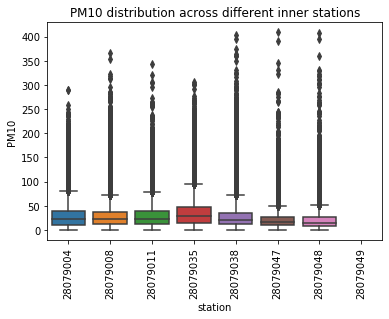

In [46]:
ax = sns.boxplot(x="station", y="PM10", data=madrid1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("PM10 distribution across different inner stations")

In [47]:
madrid2.PM10.mean()

25.47230355567067

In [48]:
madrid3.PM10.mean()

21.73880656468533

In [49]:
madrid1.PM10.mean()

27.376719836861472

In [50]:
df_mad = madrid1.drop('station', axis =1)

In [51]:
mad_avg = df_mad.groupby(['dateParsed']).agg('mean')

In [52]:
mad_avg.isnull().sum()

Unnamed: 0         0
BEN             1607
CH4           146892
CO                28
EBE             1582
MXY           101489
NMHC           17302
NO             87655
NO_2              28
NOx            59182
OXY           101366
O_3               28
PM10              60
PM25           38250
PXY           101403
SO_2              28
TCH            17303
TOL             1691
dtype: int64

In [53]:
madrid2 = mad_avg[['CO', "NO_2", "O_3", "PM10", "SO_2"]]

In [54]:
madrid2['NO_2'].fillna((madrid2['NO_2'].median()), inplace=True)
madrid2['SO_2'].fillna((madrid2['SO_2'].median()), inplace=True)
madrid2['PM10'].fillna((madrid2['PM10'].median()), inplace=True)
madrid2['O_3'].fillna((madrid2['O_3'].median()), inplace=True)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
mad_pm10 = madrid2['PM10'].resample('M').mean()
mad_so2 = madrid2['SO_2'].resample('M').mean()
mad_co = madrid2['CO'].resample('M').mean()
mad_no2 = madrid2['NO_2'].resample('M').mean()
mad_o3 = madrid2['O_3'].resample('M').mean()
mad_month = madrid2.resample('M').mean()

In [57]:
mad_pm10.head()

dateParsed
2001-01-31    29.428655
2001-02-28    36.437446
2001-03-31    23.590145
2001-04-30    25.213059
2001-05-31    30.193297
Freq: M, Name: PM10, dtype: float64

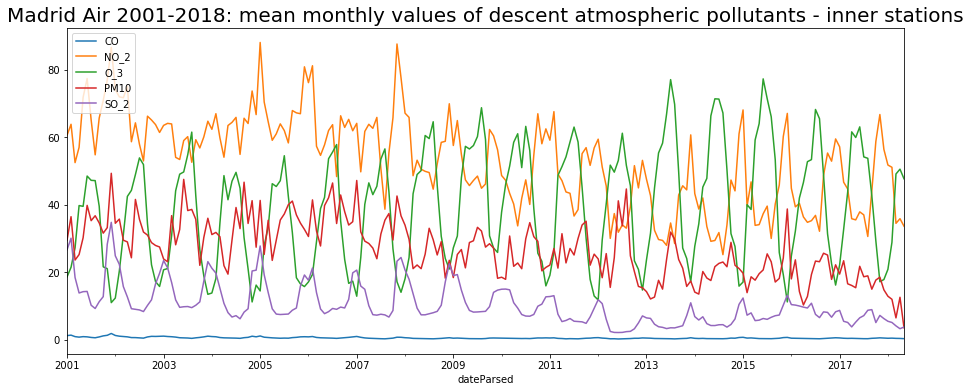

In [58]:
mad_month.plot(figsize=(15, 6))
plt.title('Madrid Air 2001-2018: mean monthly values of descent atmospheric pollutants - inner stations', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'PM10 μg/m³')

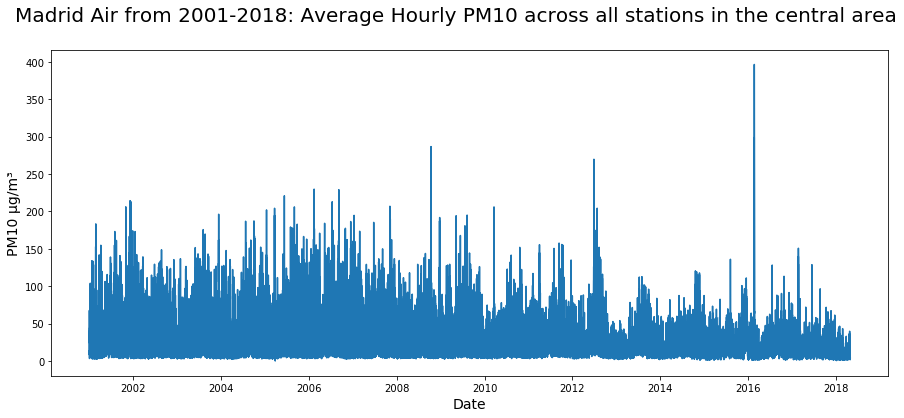

In [59]:
fig = plt.figure(figsize=(15, 6))
plt.plot(madrid2['PM10'])
fig.suptitle('Madrid Air from 2001-2018: Average Hourly PM10 across all stations in the central area', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 μg/m³', fontsize=14)

In [60]:
df_pm10  = pd.DataFrame(mad_pm10, columns = ['PM10'])

In [61]:
df_pm10.reset_index(inplace = True)

In [62]:
d = {'PM10': mad_pm10, "NO2": mad_no2, "O3": mad_o3}

In [63]:
df_air  = pd.DataFrame(d)

In [64]:
df_air.head()

,PM10,NO2,O3
dateParsed,,,
2001-01-31,29.428655,60.518890,18.580816
2001-02-28,36.437446,63.820436,21.444437
2001-03-31,23.590145,52.459866,27.212800
2001-04-30,25.213059,56.986460,39.736864
2001-05-31,30.193297,71.811340,39.505058


In [65]:
df_air.reset_index(inplace = True)

In [66]:
df_pm10.to_csv('PM10_monthly.csv')

In [67]:
df_air.to_csv('Madrid_pollutants.csv')

Text(0, 0.5, 'SO_2 μg/m³')

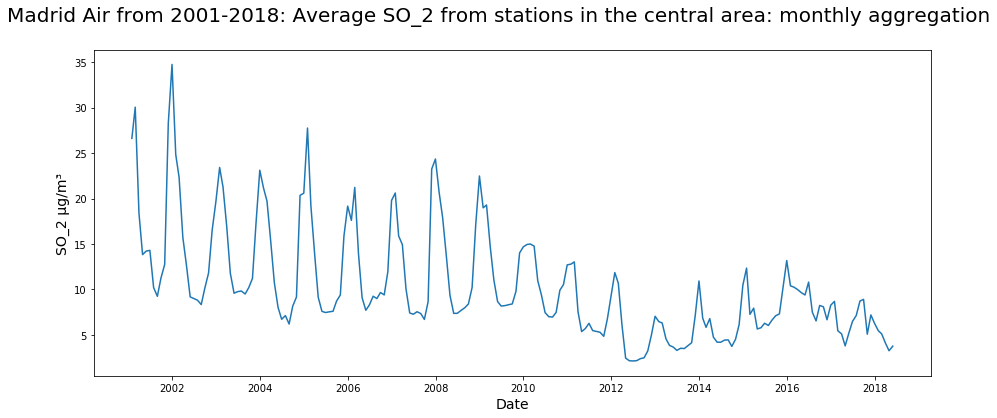

In [68]:
fig = plt.figure(figsize=(15, 6))
plt.plot(mad_so2)
fig.suptitle('Madrid Air from 2001-2018: Average SO_2 from stations in the central area: monthly aggregation', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('SO_2 μg/m³', fontsize=14)

Text(0, 0.5, 'NO_2 μg/m³')

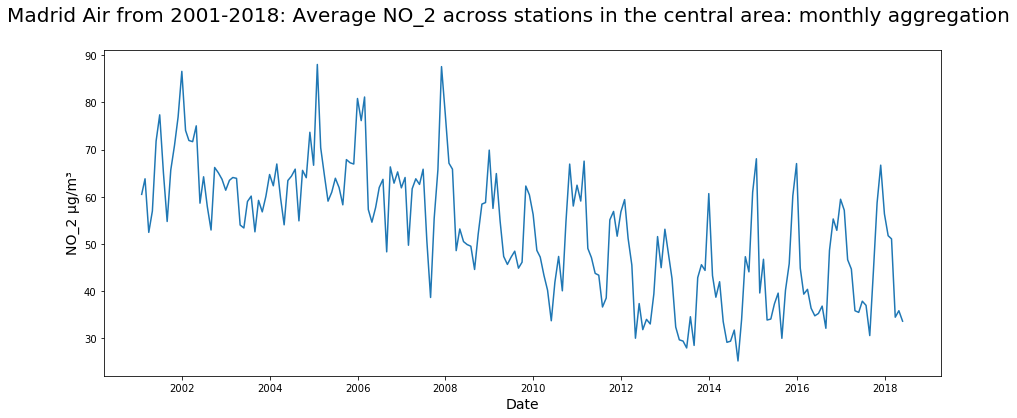

In [69]:
fig = plt.figure(figsize=(15, 6))
plt.plot(mad_no2)
fig.suptitle('Madrid Air from 2001-2018: Average NO_2 across stations in the central area: monthly aggregation', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('NO_2 μg/m³', fontsize=14)